In [59]:
from google.colab import files
uploaded = files.upload()

Saving ECOMM DATA.xlsx to ECOMM DATA.xlsx


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
sales_data = pd.read_excel("ECOMM DATA.xlsx")

In [62]:
# Data exploration and preprocessing
print(sales_data.info())
print(sales_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [63]:
# 1. Total Sales
total_sales = sales_data['Sales'].sum()
print("Total Sales:", total_sales)

Total Sales: 12642501.909880001


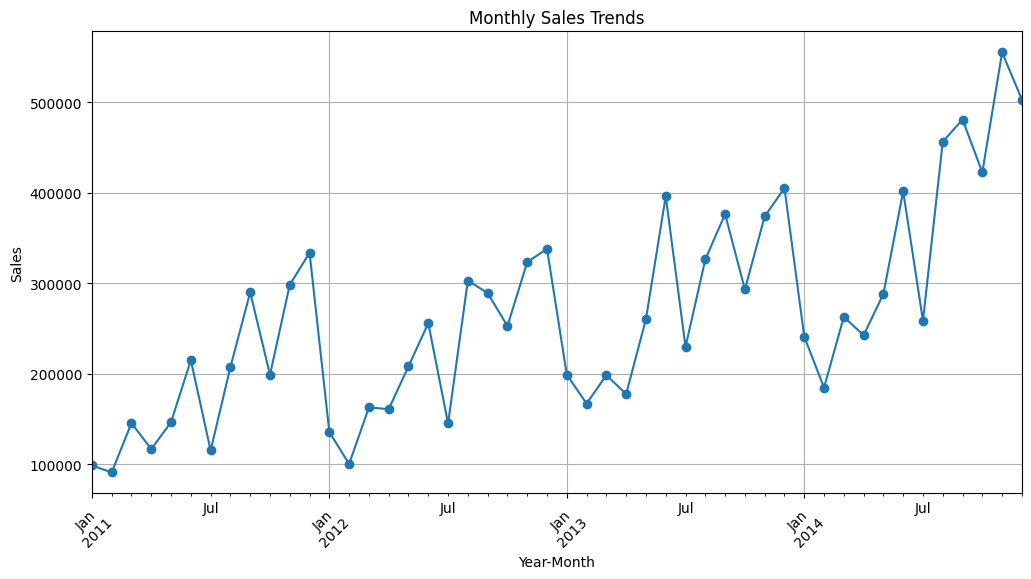

In [64]:
# 2. Sales Trends Over Time
# Convert 'Order Date' to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Extract year and month from 'Order Date'
sales_data['YearMonth'] = sales_data['Order Date'].dt.to_period('M')

# Group by year-month and sum sales
monthly_sales = sales_data.groupby('YearMonth')['Sales'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Top 10 Best-Selling Products:
Product Name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: Quantity, dtype: int64


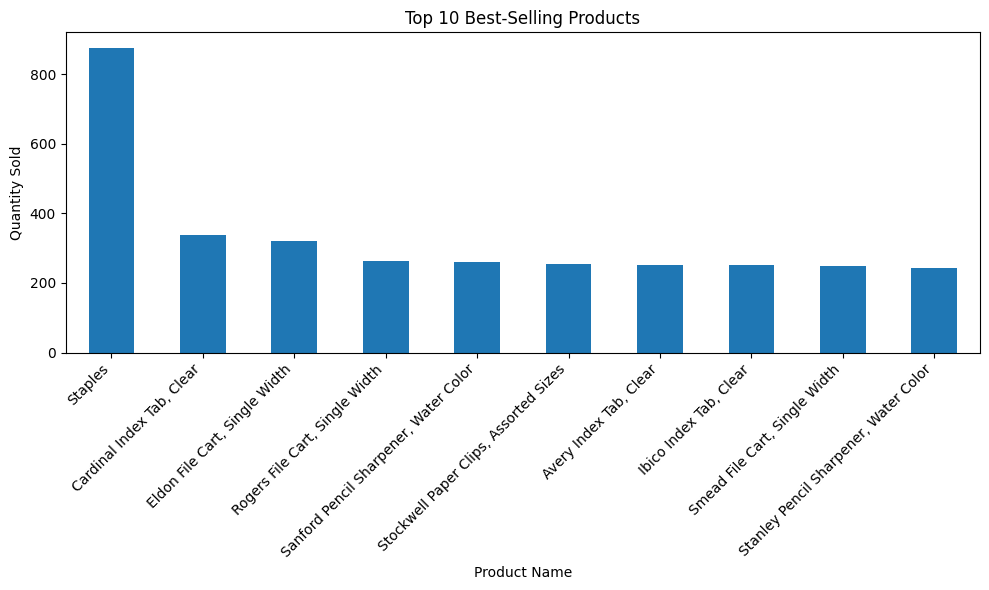

In [65]:
# 3. Best-Selling Products
best_selling_products = sales_data.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Best-Selling Products:")
print(best_selling_products)

# Plot best-selling products
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Revenue per Order: 504.99308607469555

Top 10 Products by Average Revenue:
Product Name
Cisco TelePresence System EX90 Videoconferencing Unit                    22638.480000
Canon imageCLASS 2200 Advanced Copier                                    12319.964800
Cubify CubeX 3D Printer Triple Head Print                                 7999.980000
3D Systems Cube Printer, 2nd Generation, Magenta                          7149.945000
HP Designjet T520 Inkjet Large Format Printer - 24" Color                 6124.965000
High Speed Automatic Electric Letter Opener                               5676.770667
Ibico EPK-21 Electric Binding System                                      5291.972000
Lexmark MX611dhe Monochrome Laser Printer                                 4207.475250
Chromcraft Conference Table, Fully Assembled                              4021.044000
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier     3991.980000
Name: Sales, dtype: float64


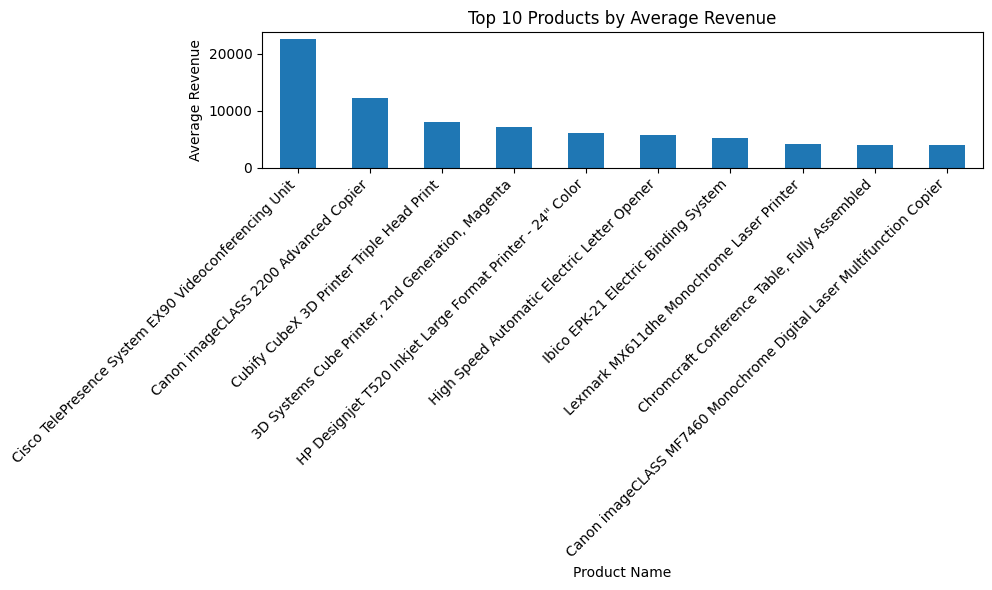

In [66]:
# 4. Revenue Indicators
# Average revenue per order
avg_revenue_per_order = sales_data.groupby('Order ID')['Sales'].sum().mean()
print("Average Revenue per Order:", avg_revenue_per_order)

# Average revenue per product
avg_revenue_per_product = sales_data.groupby('Product Name')['Sales'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Average Revenue:")
print(avg_revenue_per_product)

# Plot average revenue per product
plt.figure(figsize=(10, 6))
avg_revenue_per_product.plot(kind='bar')
plt.title('Top 10 Products by Average Revenue')
plt.xlabel('Product Name')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()